In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [25]:
f_base   =   440
f_s      = 48000

V_fs     =     3.3
N        =     8
interval =     5

RP2040   = False

V_lsb    = V_fs / (2**N - 1)
k0       = 1 / V_lsb
length   = interval * f_s

In [26]:
t = np.linspace(0, interval, length)
signal = np.sin(f_base * 2 * math.pi * t)
signal_quantized = np.round(k0 * signal)
if (RP2040 and N == 12):
    signal_quantized -= 6
    signal_quantized  = np.where(signal_quantized >   512, np.maximum(signal_quantized -  7,   512), signal_quantized)
    signal_quantized  = np.where(signal_quantized <  -512, np.minimum(signal_quantized +  7,  -512), signal_quantized)
    signal_quantized  = np.where(signal_quantized >  1024, np.maximum(signal_quantized -  3,  1024), signal_quantized)
    signal_quantized  = np.where(signal_quantized < -1024, np.minimum(signal_quantized +  3, -1024), signal_quantized)

q_error = (signal_quantized - k0 * signal) / k0

20 * np.log10(np.sqrt(np.mean(q_error ** 2)))


-48.690556433781246

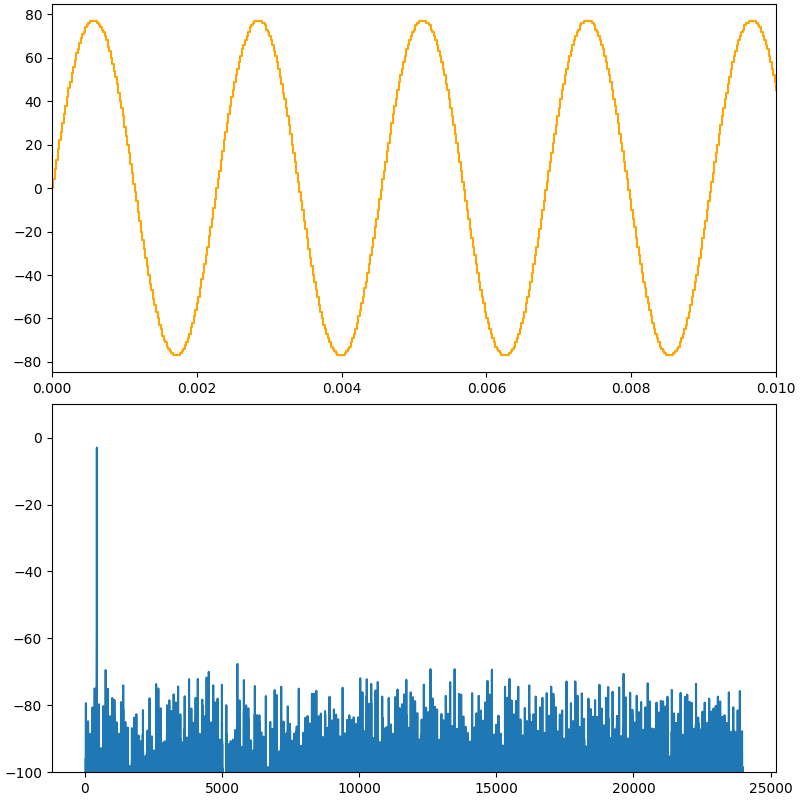

In [37]:
%matplotlib widget
#plt.ioff()
fig = plt.figure(figsize=(8, 8), label="Quantization noise", layout='constrained')
#plt.ion()

timeaxs, freqaxs = fig.subplots(2, 1)

timeaxs.set_xlim([0, 0.01])
timeaxs.plot(t, signal_quantized, drawstyle = 'steps-post', color='orange');

db_offset = 20 * math.log10(k0 / math.sqrt(2))
freq_pwr = 20 * np.log10(np.abs(np.clip(np.fft.rfft(signal_quantized / length), 0.5/length, None))) - db_offset
freqs = np.fft.rfftfreq(length, d=1.0/f_s)

freqaxs.set_ylim(-100, 10)
freqaxs.plot(freqs, freq_pwr);

